In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd

from shapely.geometry import box
import earthpy as et
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "GeoSesries.notna", UserWarning)

sns.set(font_scale=1.5)
sns.set_style("white")

data = et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

Extracted output to /home/codespace/earth-analytics/data/spatial-vector-lidar/.


In [4]:
country_boundary_us_path = os.path.join("data", "spatial-vector-lidar", "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("data", "spatial-vector-lidar",  "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)


In [5]:
print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places", pop_places.crs)

country_boundary_us EPSG:4326
state_boundary_us EPSG:4326
pop_places EPSG:4326


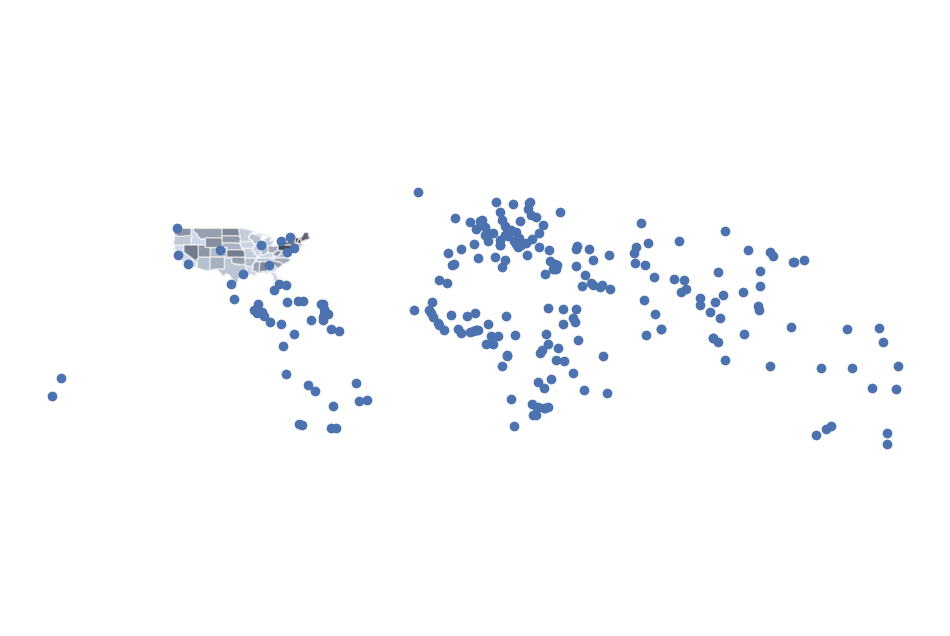

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5, ax=ax)

state_boundary_us.plot(cmap='Greys', ax=ax, alpha=.5)
pop_places.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [7]:
points_clip = gpd.clip(pop_places, country_boundary_us)

points_clip[['name', 'geometry', 'scalerank', 'natscale', ]].head()

,name,geometry,scalerank,natscale
178,Miami,POINT (-80.22605 25.78956),1,300
177,Houston,POINT (-95.34193 29.82192),1,300
179,Atlanta,POINT (-84.40190 33.83196),1,300
216,Los Angeles,POINT (-118.18193 33.99192),0,600
175,San Francisco,POINT (-122.41717 37.76920),1,300


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

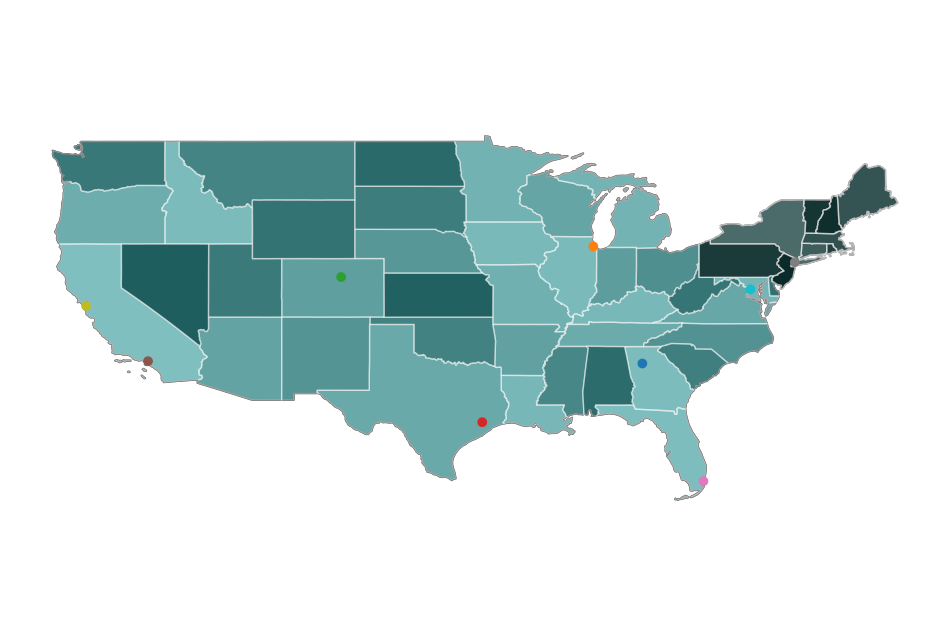

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1, color="teal", edgecolor="black", ax=ax)

state_boundary_us.plot(cmap='Greys', ax=ax, alpha=.5)

points_clip.plot(ax=ax, column='name')
ax.set_axis_off()
plt.axis('equal')

points_clip.apply(lambda x: ax.annotate(s=x['name'], xy=x.geometry.coords[0], xytext=(6, 6), textcoords="offset points", backgroundcolor="white"), axis=1)
plt.show()

TypeError: Axes.annotate() missing 1 required positional argument: 'text'

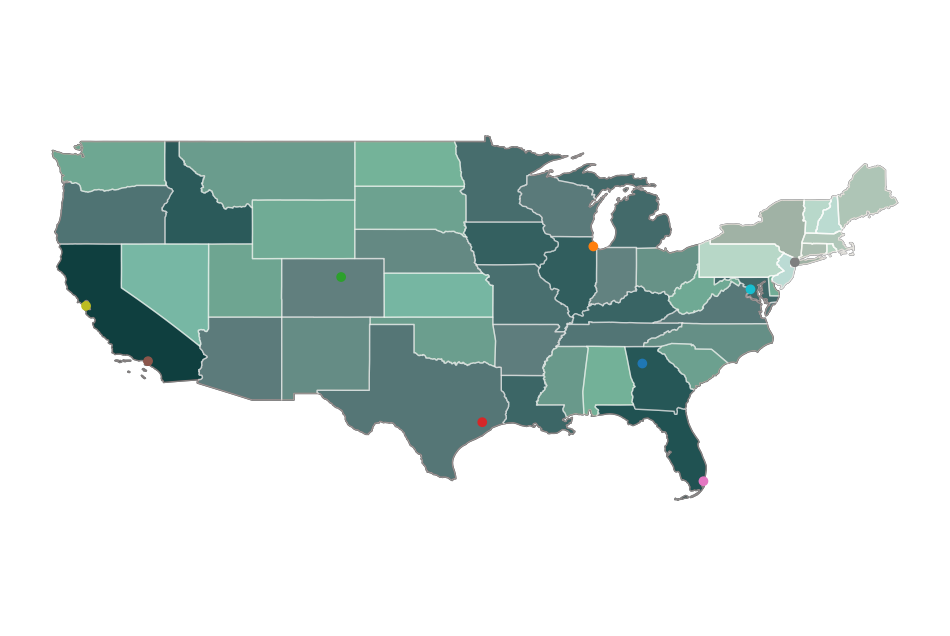

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1, color="teal", edgecolor="black", ax=ax)

state_boundary_us.plot(cmap='pink', ax=ax, alpha=.5)

points_clip.plot(ax=ax, column='name')
ax.set_axis_off()
plt.axis('equal')


points_clip.apply(lambda x: ax.annotate(s=x['name'], 
                                        xy=x.geometry.coords[0], 
                                        xytext=(6, 6), 
                                        textcoords="offset points", 
                                        backgroundcolor="green"), axis=1)
plt.show()

In [12]:
ne_roads_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_10m_roads", "ne_10m_roads.shp")

ne_roads = gpd.read_file(ne_roads_path)


In [13]:
if (ne_roads.crs == country_boundary_us.crs):
    print("Both layers are in the same crs!",
          ne_roads.crs, country_boundary_us.crs)

Both layers are in the same crs! EPSG:4326 EPSG:4326


In [14]:
ne_roads_clip = gpd.clip(ne_roads, country_boundary_us)

ne_roads_clip = ne_roads_clip[~ne_roads_clip.is_empty]

print("The clipped data have fewer line objects (represented by rows):", ne_roads_clip.shape, ne_roads.shape)


The clipped data have fewer line objects (represented by rows): (7363, 32) (56601, 32)


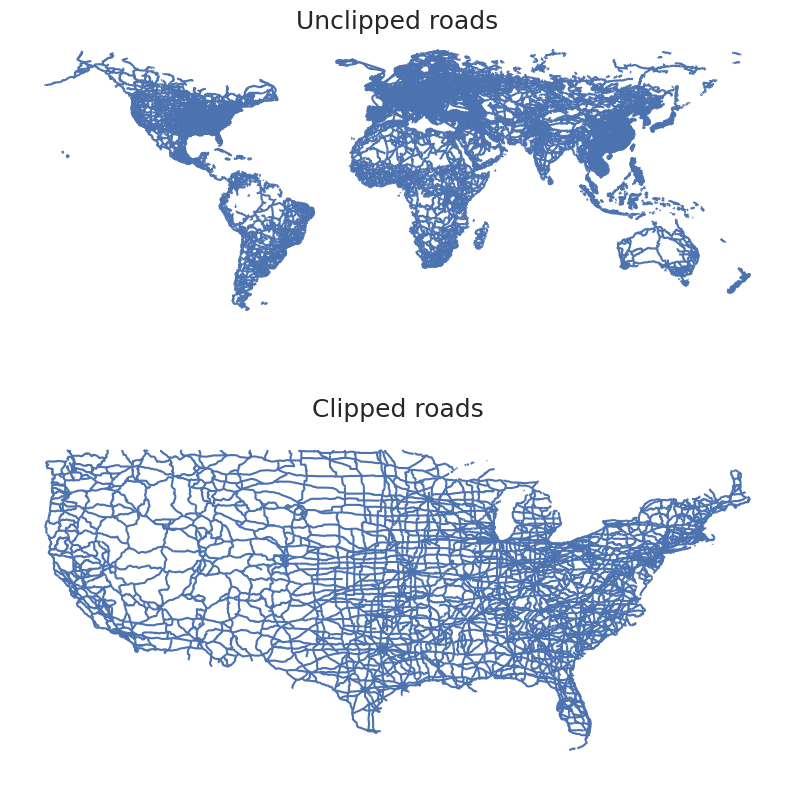

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ne_roads.plot(ax=ax1)
ne_roads_clip.plot(ax=ax2)

ax1.set_title("Unclipped roads")
ax2.set_title("Clipped roads")

ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()


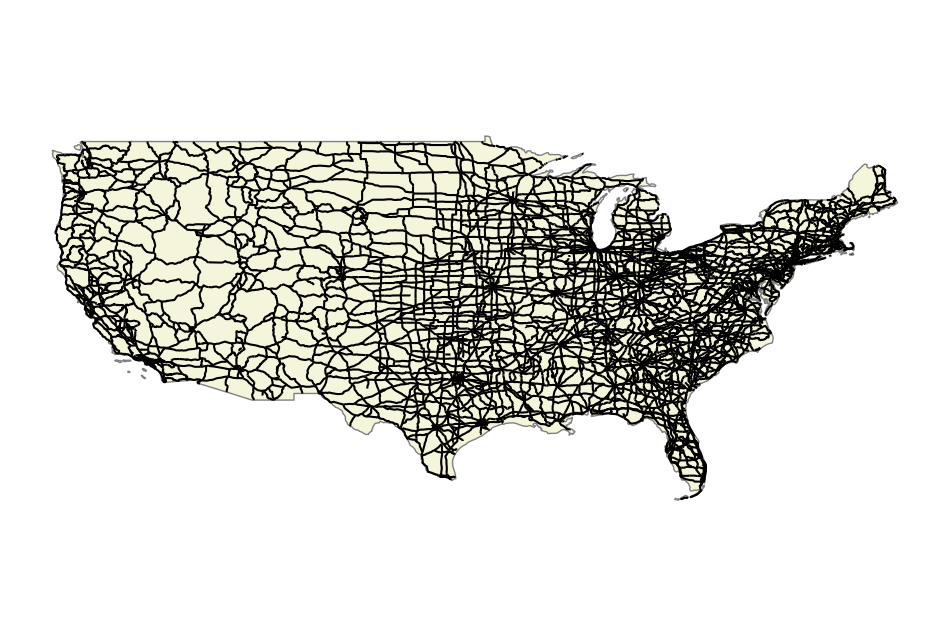

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1, color="beige", edgecolor="Grey", ax=ax)

ne_roads_clip.plot(ax=ax, color="Black")

ax.set_axis_off()
plt.axis('equal')
plt.show()


In [20]:
country_boundary_us_sim = country_boundary_us.simplify(.9, preserve_topology=True)

country_boundary_us_sim

0    MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...
dtype: geometry

<Axes: >

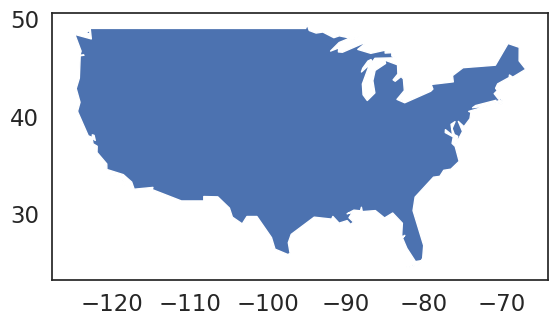

In [19]:
country_boundary_us_sim.plot()

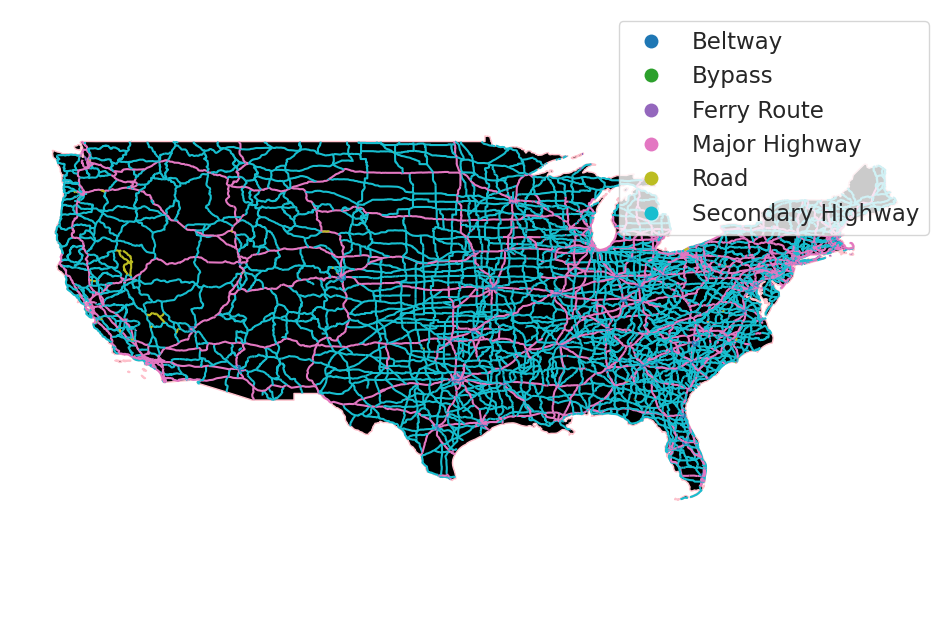

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

country_boundary_us.plot(alpha=1, color="black", edgecolor="pink", ax=ax)
ne_roads_clip.plot(ax=ax, column="type", legend=True)

ax.set_axis_off()
plt.axis("equal")
plt.show()


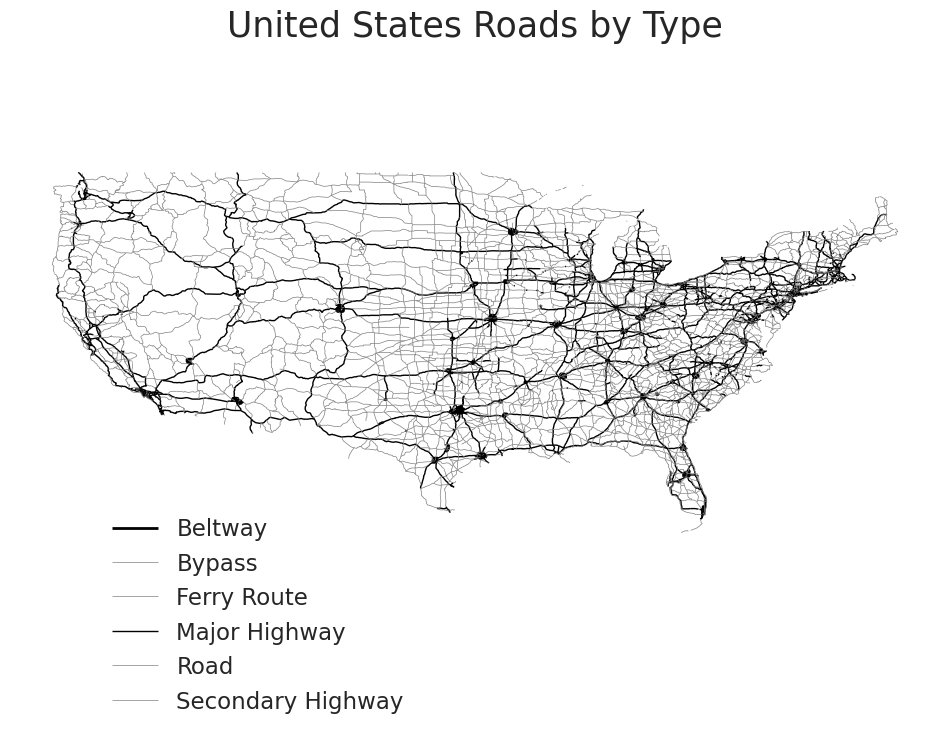

In [23]:
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['black', 1]}

fig, ax = plt.subplots(figsize=(12, 8))

for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0], label=ctype, ax=ax, linewidth=road_attrs[ctype][1])

ax.legend(frameon=False, 
          loc = (0.1, -0.1))

ax.set_title("United States Roads by Type", fontsize=25)
ax.set_axis_off()

plt.axis('equal')
plt.show()